## Working with the DataBase: VENPAYBI

### The Table dbo.CoffeeCappTransByMerchantInstantKpis

In [1]:
import os
import sys
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [2]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

First establish connection to the database using python

In [3]:
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'vpay-asdmi.public.21203d2a181c.database.windows.net,3342' 
database = 'VENPAY-BI' 
username = 'nandaa' 
password = 'Timileyin1998'  

engine = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = engine.cursor()

In [4]:

sql = "SELECT  * FROM CoffeeCappTransByMerchantInstantKpis"

df_coffee1 = pd.read_sql(sql, engine)
df_coffee1

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,1,2022-11-30 13:55:00,1,Vending Company,0,0,0,0,0,0
1,2,2022-11-30 13:55:00,2,BiTX,0,0,0,0,0,0
2,3,2022-11-30 13:55:00,4,Vaportris,0,0,0,0,0,0
3,4,2022-11-30 13:55:00,6,EOS Srl,0,0,0,0,0,0
4,5,2022-11-30 13:55:00,7,Your Best Break,1089,915,50,98,26,0
...,...,...,...,...,...,...,...,...,...,...
95,96,2022-11-30 14:00:00,63,Vat,0,0,0,0,0,0
96,97,2022-11-30 14:00:00,64,Daba Snc,1,1,0,0,0,0
97,98,2022-11-30 14:00:00,65,D8,0,0,0,0,0,0
98,99,2022-11-30 14:00:00,66,Espressomat,0,0,0,0,0,0


In [5]:
df_coffee1.where(df_coffee1['SystemErrorsCounter'] != 0).dropna()

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter


In [6]:
df_coffee1.columns

Index(['PK_CoffeeCappTransByMerchantInstantKpisId', 'ReferenceDate',
       'EK_MerchantId', 'MerchantName', 'TotalTransactionsCounter',
       'CompletedTransactionsCounter', 'ValidationErrorsCounter',
       'ConnectionErrorsCounter', 'RejectionErrorsCounter',
       'SystemErrorsCounter'],
      dtype='object')

In [7]:
# drop all categorical features

cat_features= ["PK_CoffeeCappTransByMerchantInstantKpisId", "ReferenceDate", "EK_MerchantId", "MerchantName"]
df_coffee_cont_feat = df_coffee1.drop(cat_features, axis=1)
df_coffee_cont_feat

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1089,915,50,98,26,0
...,...,...,...,...,...,...
95,0,0,0,0,0,0
96,1,1,0,0,0,0
97,0,0,0,0,0,0
98,0,0,0,0,0,0


### Explore the continous variables 

In [8]:
df_coffee_cont_feat.describe()

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.0
mean,28.000000,22.340000,1.77000,2.850000,1.040000,0.0
std,161.561447,129.057204,10.06931,17.264651,6.172471,0.0
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,1.000000,1.000000,0.00000,0.000000,0.000000,0.0
max,1204.000000,919.000000,87.00000,143.000000,55.000000,0.0


In [9]:
cat_features= ["PK_CoffeeCappTransByMerchantInstantKpisId", "ReferenceDate", "EK_MerchantId"]
df_coffee1.drop(cat_features, axis=1, inplace=True)
df_coffee1

,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,Vending Company,0,0,0,0,0,0
1,BiTX,0,0,0,0,0,0
2,Vaportris,0,0,0,0,0,0
3,EOS Srl,0,0,0,0,0,0
4,Your Best Break,1089,915,50,98,26,0
...,...,...,...,...,...,...,...
95,Vat,0,0,0,0,0,0
96,Daba Snc,1,1,0,0,0,0
97,D8,0,0,0,0,0,0
98,Espressomat,0,0,0,0,0,0


In [10]:
df_coffee1.groupby('MerchantName').mean()

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
MerchantName,,,,,,
Accenture,0.0,0.0,0.0,0.0,0.0,0.0
Aesse Service Srl,0.0,0.0,0.0,0.0,0.0,0.0
Automatic Service,0.0,0.0,0.0,0.0,0.0,0.0
BIANCHI INDUSTRY,0.0,0.0,0.0,0.0,0.0,0.0
BiTX,0.0,0.0,0.0,0.0,0.0,0.0
Break Service,0.0,0.0,0.0,0.0,0.0,0.0
Cesena Vending,0.0,0.0,0.0,0.0,0.0,0.0
Ciesse Caffe,3.5,2.5,1.0,0.0,0.0,0.0
Coffee Store,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_coffee1.groupby(df_coffee1['TotalTransactionsCounter']!=0).mean()

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
TotalTransactionsCounter,,,,,,
False,0.000000,0.000000,0.000000,0.000000,0.0,0.0
True,107.692308,85.923077,6.807692,10.961538,4.0,0.0


In [12]:
df_nonzerotrans = df_coffee1.where(df_coffee1['TotalTransactionsCounter']!=0).dropna()
df_nonzerotrans.groupby('MerchantName').mean()

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
MerchantName,,,,,,
Ciesse Caffe,3.5,2.5,1.0,0.0,0.0,0.0
Daba Snc,1.0,1.0,0.0,0.0,0.0,0.0
EOS Srl,2.0,2.0,0.0,0.0,0.0,0.0
Elleti Distribuzione,4.5,4.5,0.0,0.0,0.0,0.0
Eurocedibe,2.0,2.0,0.0,0.0,0.0,0.0
Geos Sardegna,1.5,1.5,0.0,0.0,0.0,0.0
Gruppo Illiria,2.5,2.5,0.0,0.0,0.0,0.0
Ivs France,40.5,32.0,5.5,2.5,0.5,0.0
Ivs Iberica,75.5,62.0,4.0,8.5,1.0,0.0


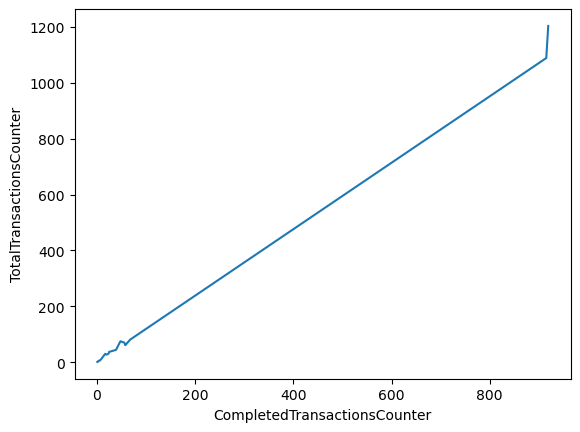

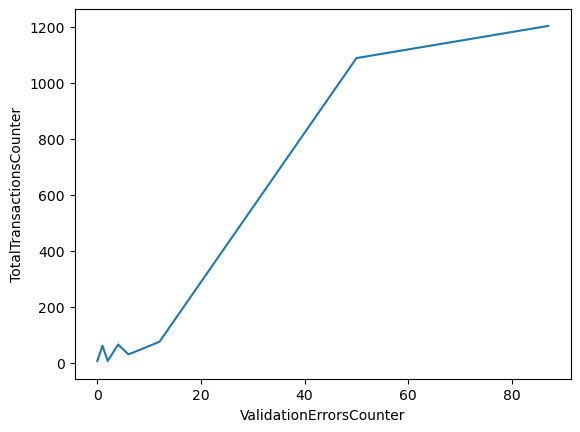

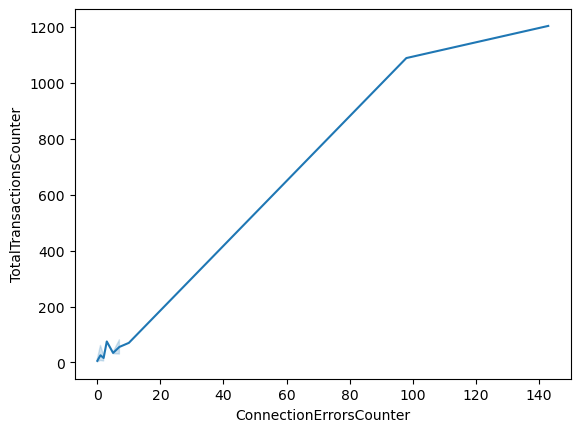

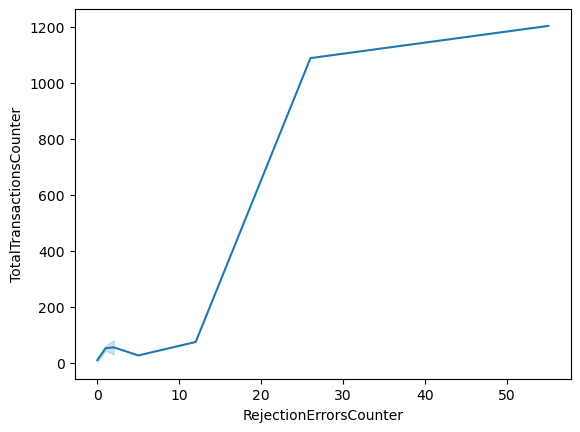

In [13]:
for i, col in enumerate(['CompletedTransactionsCounter', 'ValidationErrorsCounter', 'ConnectionErrorsCounter', 'RejectionErrorsCounter']):
    plt.figure(i)
    sns.lineplot(x=col, y='TotalTransactionsCounter', data=df_nonzerotrans)

In [14]:
#df_nonzerotrans.pivot_table(index='MerchantName', columns=, aggfunc= )

### Split into train, validation and test set

In [15]:
features = df_nonzerotrans.drop(['MerchantName','TotalTransactionsCounter'], axis=1)
target = df_nonzerotrans['TotalTransactionsCounter']

In [16]:
features.head()

,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
4,915.0,50.0,98.0,26.0,0.0
11,24.0,0.0,5.0,2.0,0.0
22,25.0,7.0,5.0,0.0,0.0
23,68.0,4.0,7.0,2.0,0.0
25,48.0,12.0,3.0,12.0,0.0


In [17]:
target.head()

4     1089.0
11      31.0
22      37.0
23      81.0
25      75.0
Name: TotalTransactionsCounter, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [19]:
print(len(target), len(y_train), len(y_val), len(y_test))

26 15 6 5


### Linear Regression Model

In [20]:
model = LinearRegression()

In [21]:
scores = cross_val_score(model, features, target.values.ravel(), cv=5)

In [22]:
scores

array([1., 1., 1., 1., 1.])

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_predict = model.predict(X_test)

In [26]:
mean_squared_error(y_test, y_predict)

8.407679527845543e-28

##### The total number of Coffee Transactions for each Merchant is displayed below

In [27]:

query = """
        SELECT MerchantName, SUM(TotalTransactionsCounter) AS TotalTrans, SUM(CompletedTransactionsCounter) AS TotalCompTrans  
        FROM CoffeeCappTransByMerchantInstantKpis
        GROUP BY MerchantName
        ORDER BY TotalCompTrans DESC
"""

df_coffee3 = pd.read_sql(query, engine)
df_coffee3

,MerchantName,TotalTrans,TotalCompTrans
0,Your Best Break,46485015,37000219
1,Sogedai,4767018,3937497
2,Ivs Iberica,3600157,3037074
3,Ivs France,1320627,1088780
4,Liomatic,728379,533142
...,...,...,...
87,MUNDICACAU LDA,31,0
88,ORASESTA SPA,0,0
89,Mpay Your Voice,0,0
90,Parivend,0,0


In [28]:
query = """
SELECT MerchantName, TotalTrans, TotalCompTrans FROM 
        (
        SELECT MerchantName, SUM(TotalTransactionsCounter) AS TotalTrans, SUM(CompletedTransactionsCounter) AS TotalCompTrans  
        FROM CoffeeCappTransByMerchantInstantKpis
        WHERE TotalTransactionsCounter != 0
        GROUP BY MerchantName ) T1
WHERE T1.TotalTrans > 200000
ORDER BY TotalCompTrans DESC
"""

df_coffee3 = pd.read_sql(query, engine)
df_coffee3

,MerchantName,TotalTrans,TotalCompTrans
0,Your Best Break,46485015,37000219
1,Sogedai,4767018,3937497
2,Ivs Iberica,3600157,3037074
3,Ivs France,1320627,1088780
4,Liomatic,728379,533142
5,ProntoCoffee,541806,442265
6,Ciesse Caffe,268919,230173


<Axes: xlabel='MerchantName'>

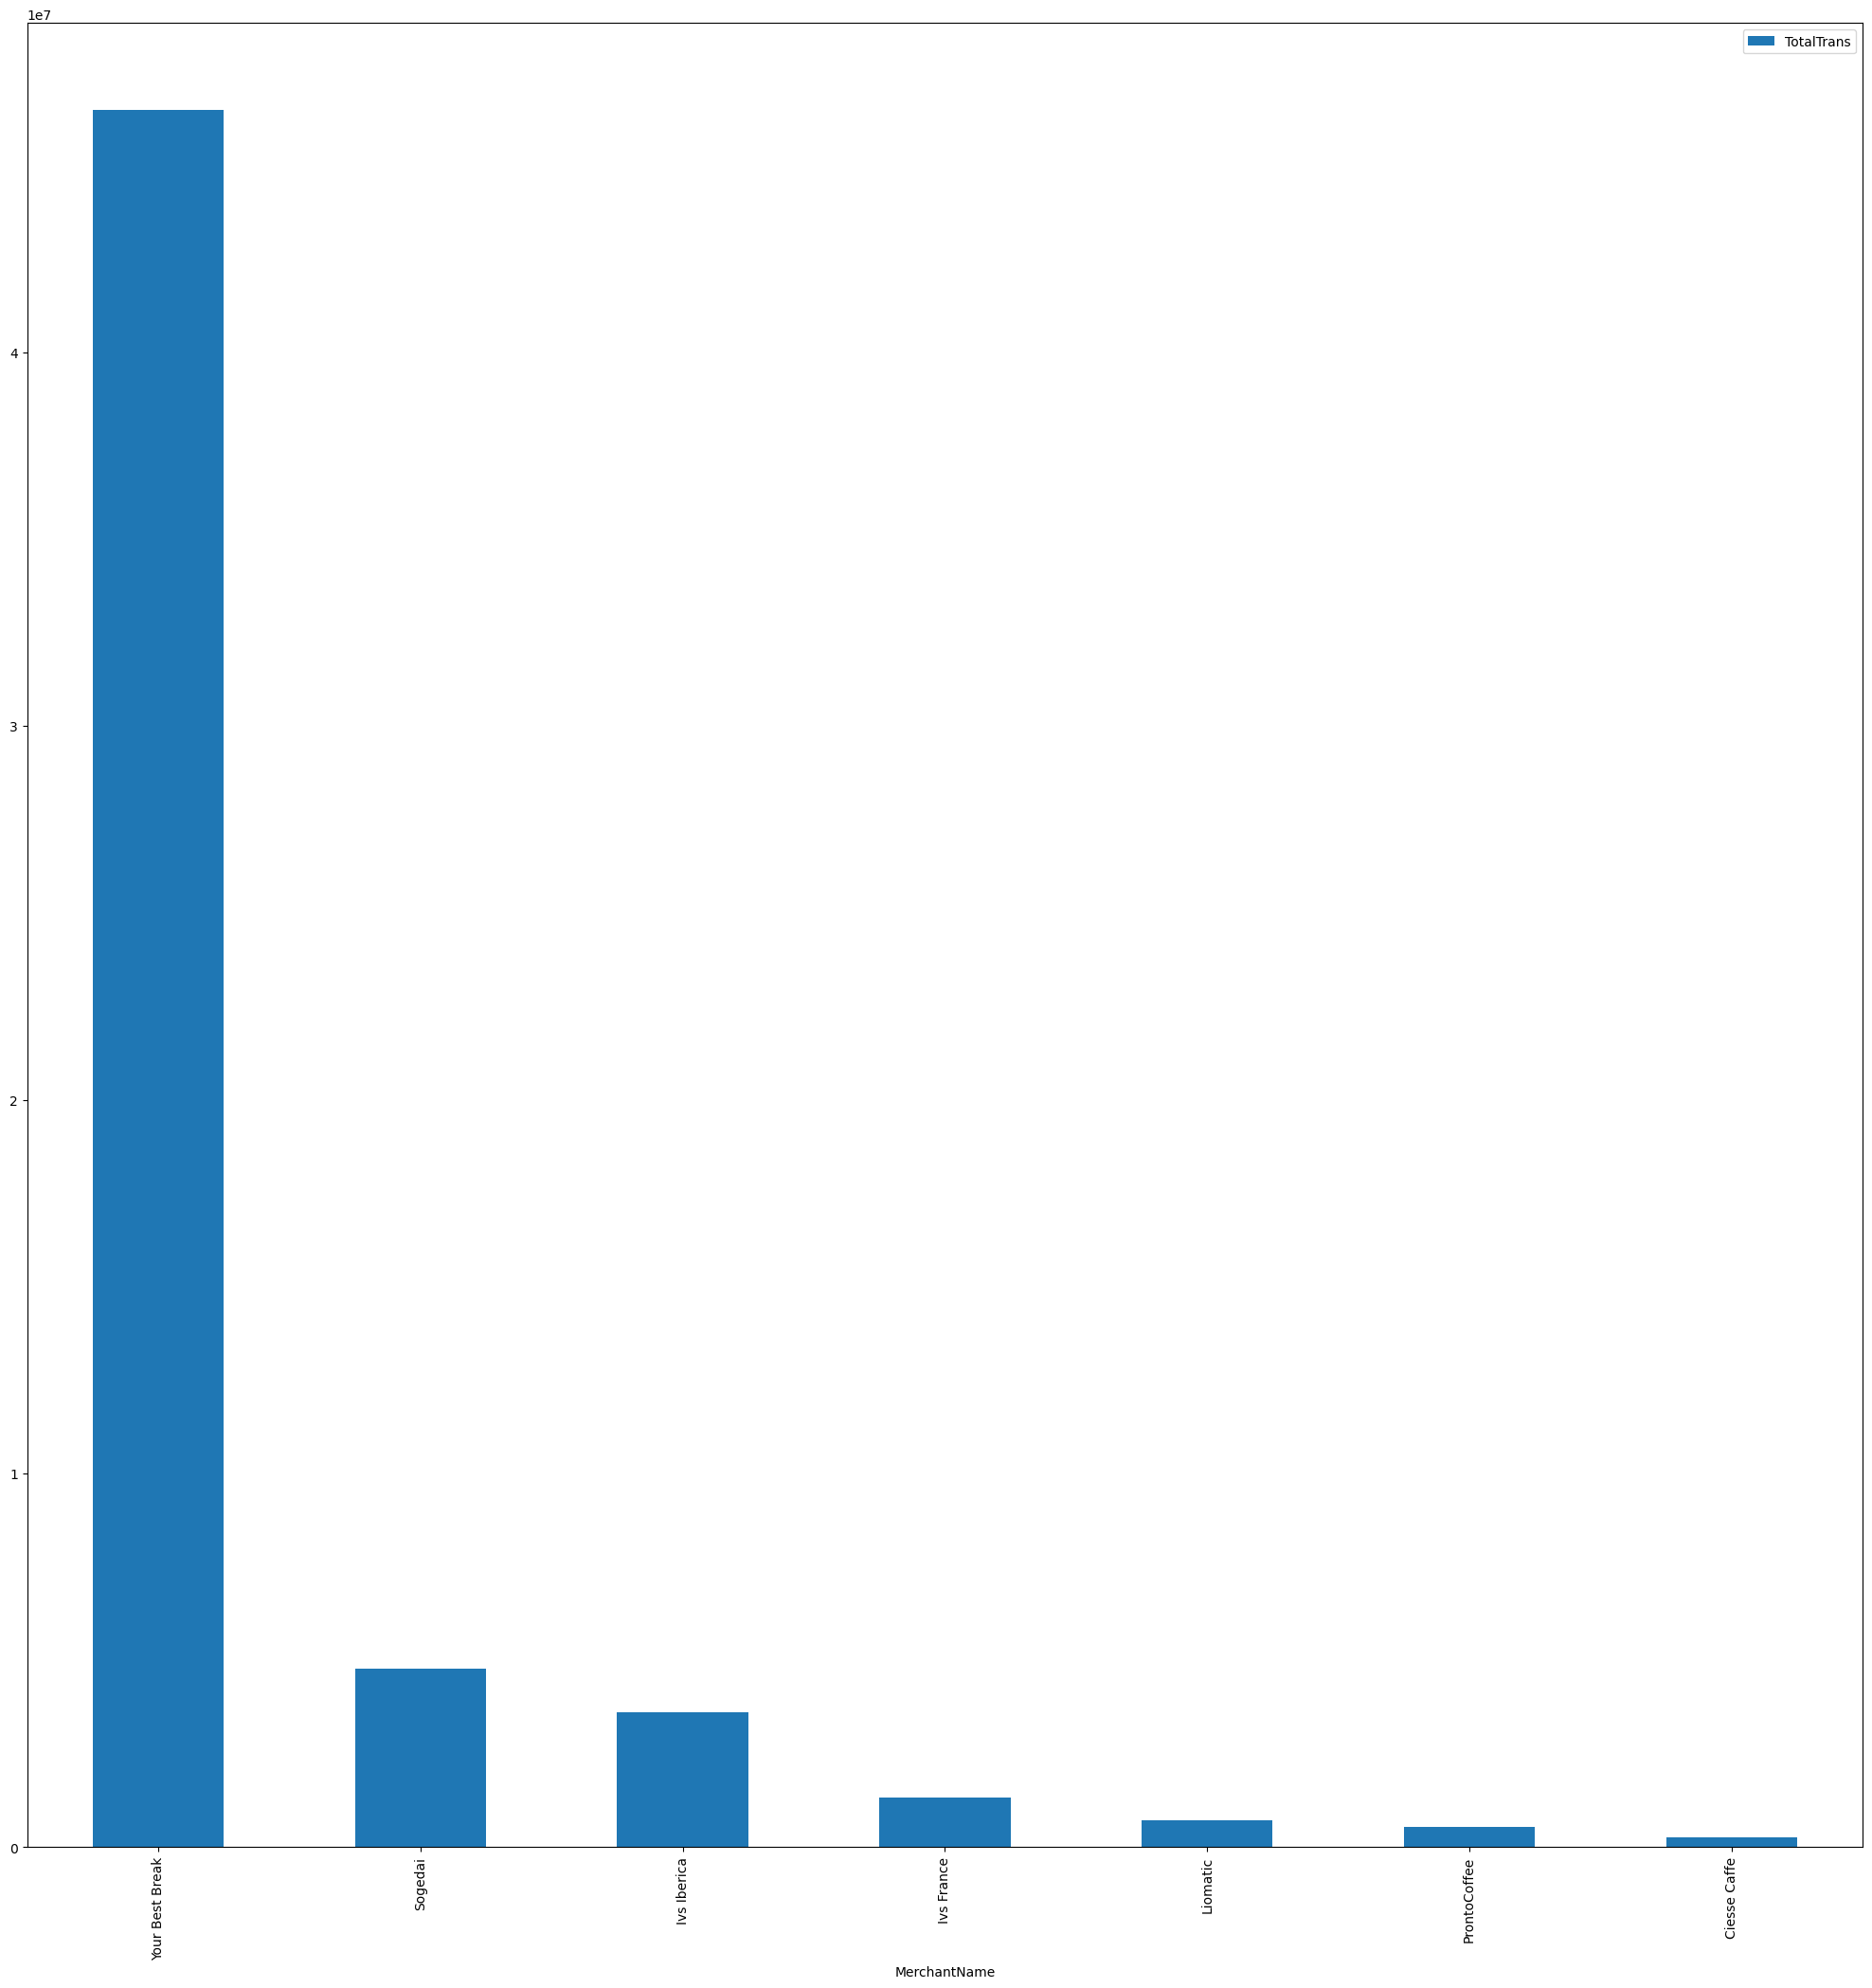

In [29]:
df_coffee3.plot(
  kind="bar",
  x="MerchantName",     
  y="TotalTrans",
  figsize=(25, 25)
  )

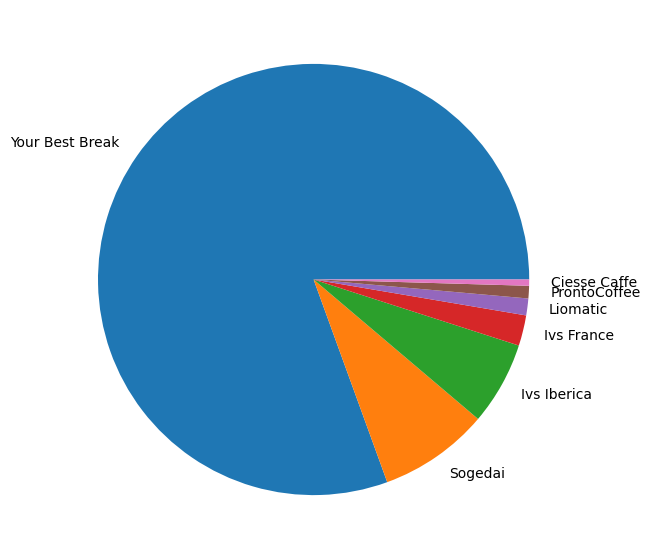

In [30]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(df_coffee3['TotalTrans'], labels = df_coffee3['MerchantName'])
 
# show plot
plt.show()

<Axes: xlabel='MerchantName'>

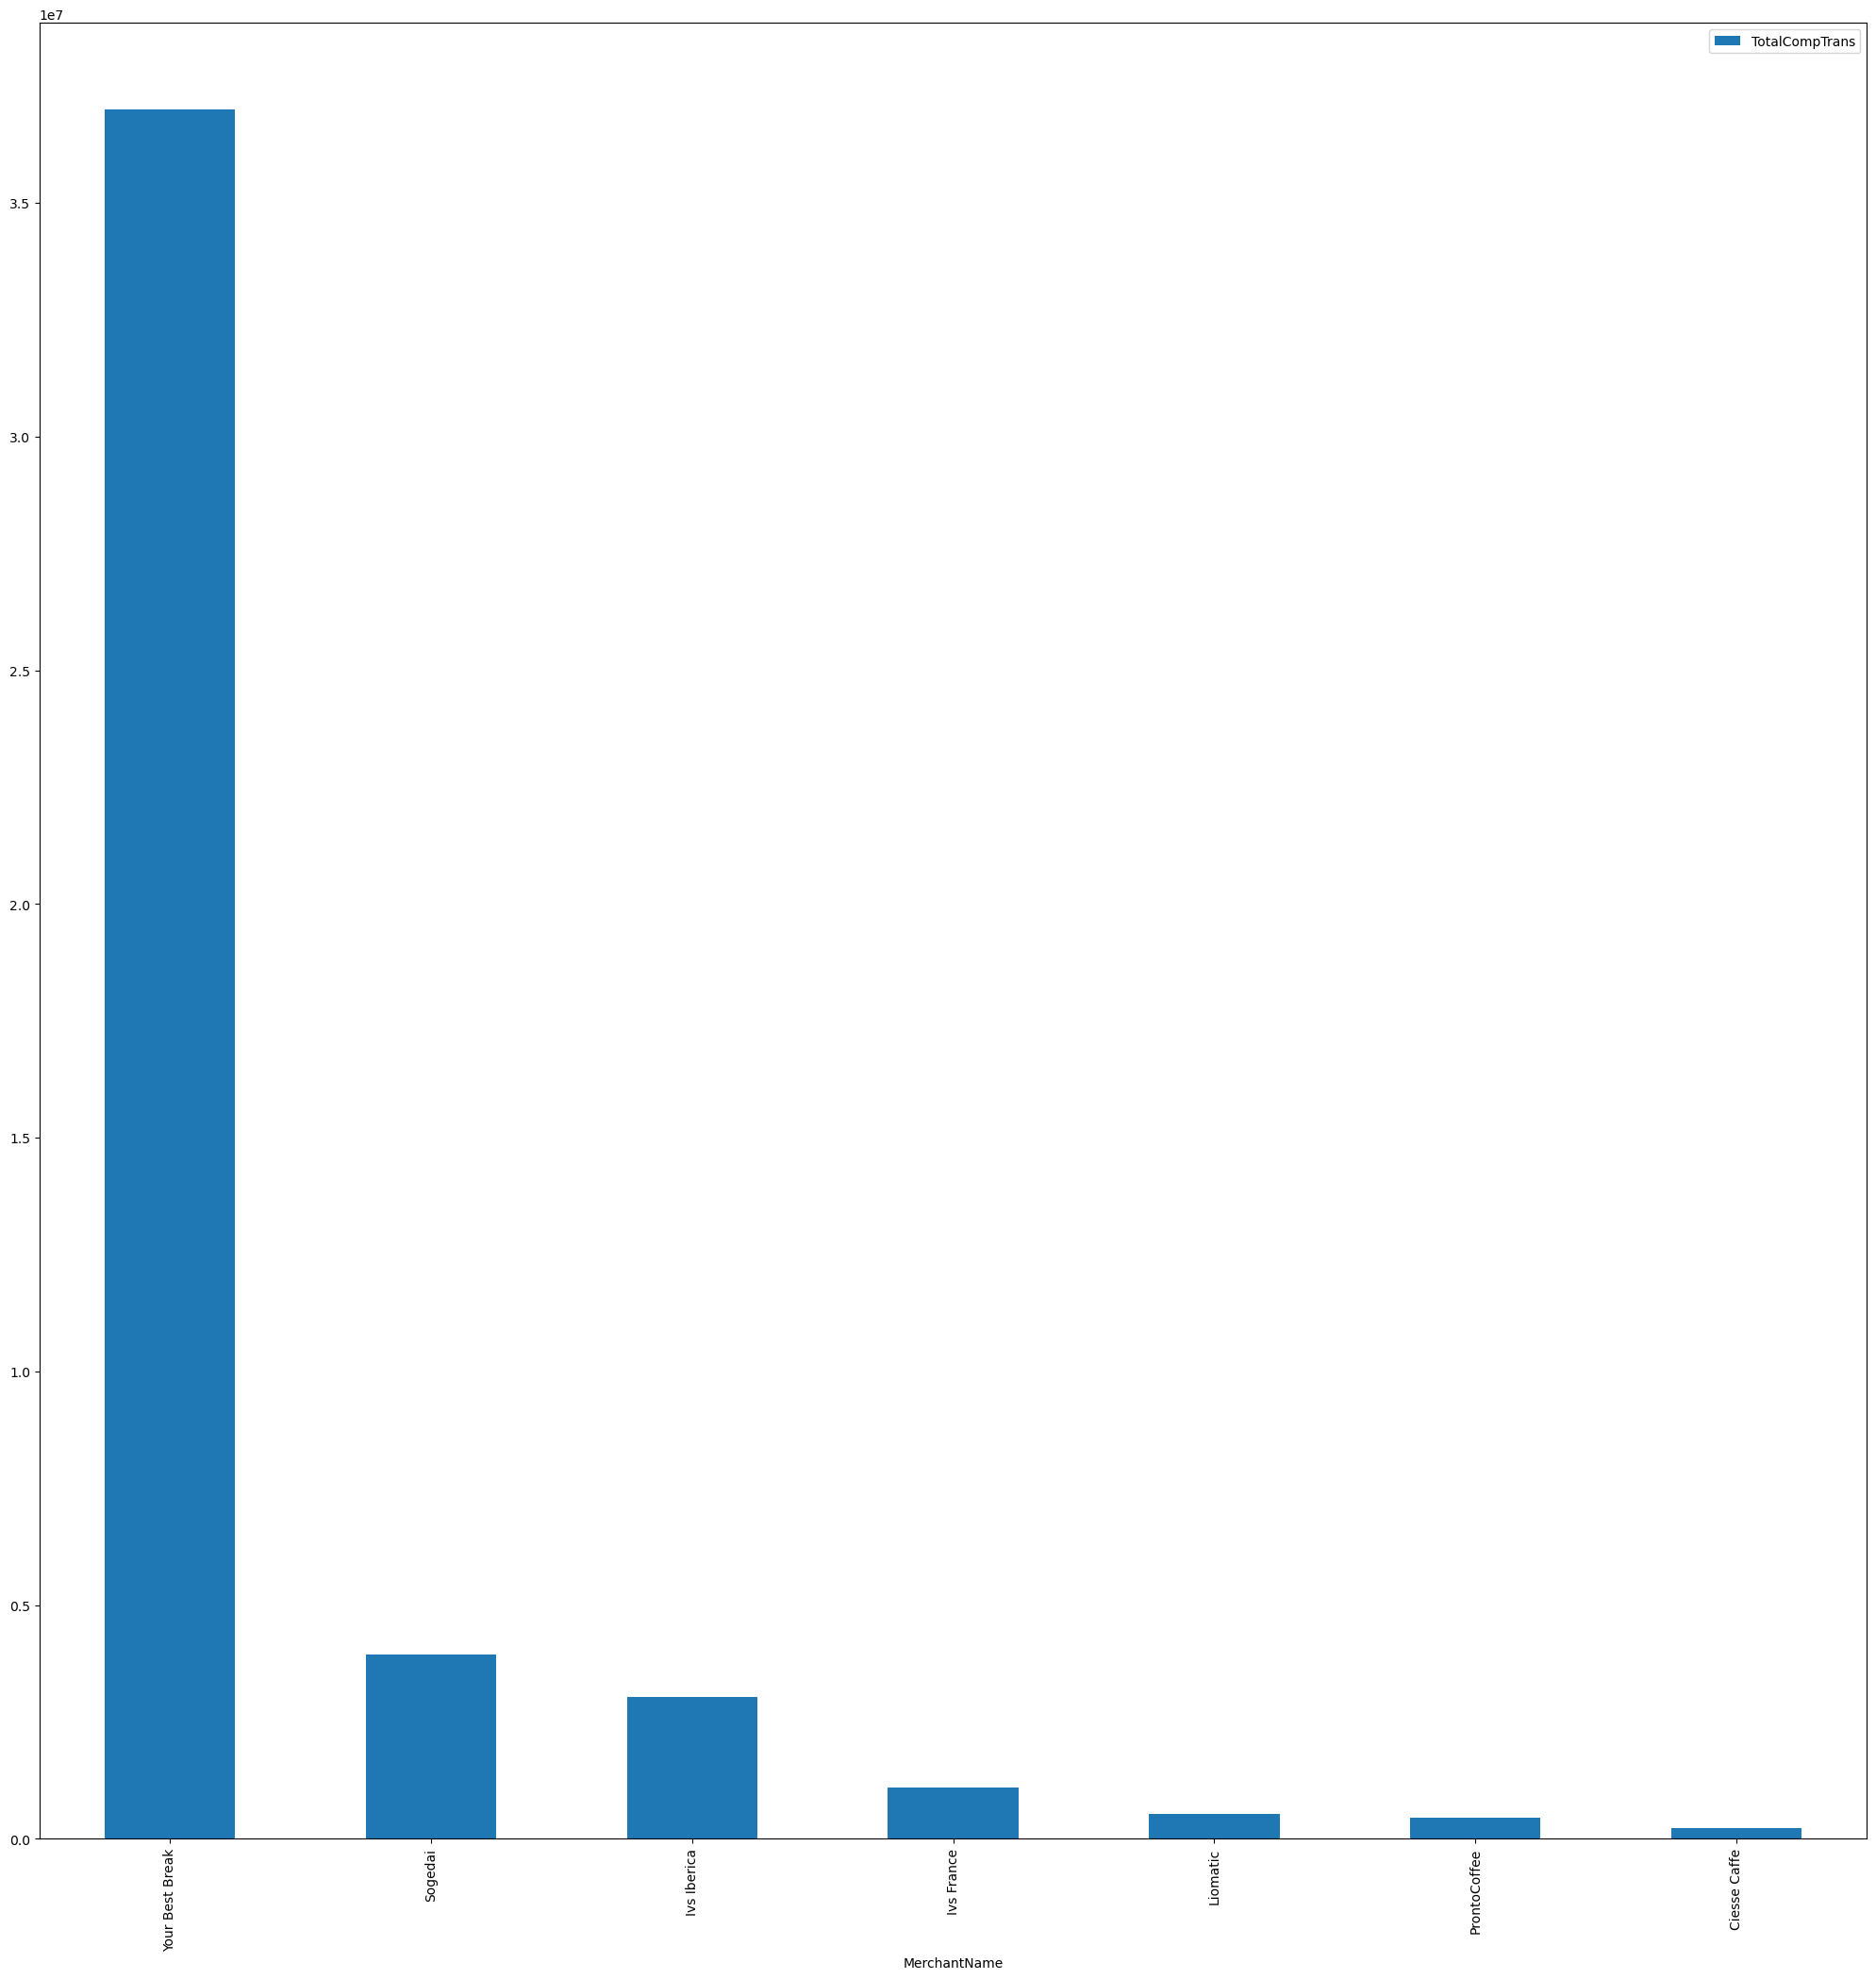

In [31]:
df_coffee3.plot(
  kind="bar",
  x="MerchantName",     
  y="TotalCompTrans",
  figsize=(25, 25)
  )